In [1]:
import pandas as pd

!wget https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv

--2023-02-02 02:58:32--  https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191962 (187K) [text/csv]
Saving to: ‘abalone.csv’

abalone.csv         100%[===================>] 187.46K   719KB/s    in 0.3s    

2023-02-02 02:58:32 (719 KB/s) - ‘abalone.csv’ saved [191962/191962]



# Read in Abalone data

In [2]:
df = pd.read_csv("abalone.csv")

# Explore the data

In this lab, you're going to drop features and scatter the points after projecting along 2 principle components axes.

For example, you may drop columns in `Pandas` by typing 


1. Prune the data. Drop columns `Sex` and/or `Rings`. \
   ```matrix = df.loc[:, df.columns != "Sex"]```

1. Calculate the covariance matrix. You can calculate the covariance matrix via: \
   $$Cov(X_i, X_j) = \mathbb{E}[(X_i - \mu_{x_i})(X_j - \mu_{x_j})^T]$$

1. Calculate the first two components of PCA. You can feel free to use `np.linalg.eig`.

1. Verify the principle components. To calculate PCA, feel free to use the PCA function from `scikit.learn`. \

  ```
  from sklearn.decomposition import PCA
  # Two components of PCA
  pca = PCA(2)

  # Fit on data
  pca.fit(A)

  # Access values and vectors
  print(pca.components_)
  print(pca.explained_variance_)

  # transform data
  B = pca.transform(A)
  print(B)
  ```

1. Scatter the data to view it in two dimensions

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [16]:
matrix = df.loc[:, df.columns != "Sex"]

In [17]:
pca = PCA(2)
pca.fit(matrix)

In [19]:
print(pca.components_)

[[ 0.02105132  0.01794012  0.0073163   0.08368049  0.02973466  0.01745992
   0.02743115  0.99510682]
 [ 0.18305275  0.14880419  0.05245956  0.83446131  0.3999516   0.18325279
   0.20527245 -0.0979371 ]]


In [20]:
print(pca.explained_variance_)

[10.49543138  0.23926882]


In [21]:
df_pca = pca.transform(matrix)

In [22]:
print(df_pca)

[[ 5.00480331 -0.86692655]
 [-2.99106199 -0.43457164]
 [-0.94603495 -0.08673867]
 ...
 [-0.88806992  0.5087862 ]
 [ 0.0998919   0.34089986]
 [ 2.18474351  1.11378693]]


In [ ]:
plt.scatter()

In [41]:
matrix.cov()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,0.014422,0.011761,0.004157,0.054491,0.023935,0.011887,0.015007,0.215562
Diameter,0.011761,0.009849,0.003461,0.045038,0.019674,0.009787,0.012507,0.183872
Height,0.004157,0.003461,0.001750,0.016803,0.007195,0.003660,0.004759,0.075179
Whole weight,0.054491,0.045038,0.016803,0.240481,0.105518,0.051946,0.065216,0.854409
Shucked weight,0.023935,0.019674,0.007195,0.105518,0.049268,0.022675,0.027271,0.301204
Viscera weight,0.011887,0.009787,0.003660,0.051946,0.022675,0.012015,0.013850,0.178057
Shell weight,0.015007,0.012507,0.004759,0.065216,0.027271,0.013850,0.019377,0.281663
Rings,0.215562,0.183872,0.075179,0.854409,0.301204,0.178057,0.281663,10.395266


In [42]:
eig_val, eig_vec = np.linalg.eig(matrix.cov())

In [43]:
eig_val

array([1.04954314e+01, 2.39268823e-01, 3.02087647e-03, 2.60218996e-03,
       1.05068657e-03, 1.47688518e-04, 4.88782005e-04, 4.17493194e-04])

In [44]:
eig_vec

array([[-2.10513202e-02,  1.83052752e-01, -7.42040211e-01,
         9.06887398e-02,  3.07007218e-02, -6.18893826e-01,
         1.52311416e-01, -5.43508715e-03],
       [-1.79401219e-02,  1.48804192e-01, -5.96175335e-01,
         4.20854302e-02, -2.33409653e-02,  7.83141972e-01,
         7.49734266e-02, -2.93613363e-02],
       [-7.31629638e-03,  5.24595599e-02, -1.40358287e-01,
        -3.71173260e-02, -1.45782231e-03, -4.21715859e-02,
        -9.10437257e-01, -3.81365645e-01],
       [-8.36804920e-02,  8.34461310e-01,  2.28847916e-01,
        -2.20616051e-01,  1.25570884e-01, -2.50039224e-03,
         1.82698066e-01, -3.82722100e-01],
       [-2.97346596e-02,  3.99951598e-01,  1.36354791e-01,
         7.54544047e-01, -3.31709499e-01,  5.43703582e-03,
        -1.68819392e-01,  3.35655300e-01],
       [-1.74599170e-02,  1.83252786e-01, -7.74498237e-03,
        -7.33235758e-02,  7.56051666e-01,  2.91035964e-02,
        -2.30202123e-01,  5.78984522e-01],
       [-2.74311519e-02,  2.052724

In [51]:
eig_val.argsort()

array([5, 7, 6, 4, 3, 2, 1, 0])

In [57]:
pca1 = matrix @ eig_vec[0] 

In [58]:
pca2 = matrix @ eig_vec[1]

In [59]:
print(eig_val[0], eig_val[1])

10.495431376079713 0.23926882290481322


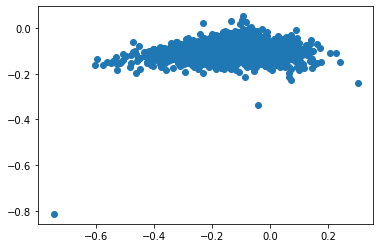

In [61]:
plt.scatter(pca2, pca1)